### Pearson Correlation Coefficient

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
human_gr = pd.read_csv('/content/drive/MyDrive/Jyothi Mam/correlation/new/scaled_output_final.csv')

ai_gr = pd.read_csv('/content/drive/MyDrive/Jyothi Mam/correlation/new/human rating for pretrained models.csv')

dfh = human_gr

dfa = ai_gr

In [4]:
dfh.shape

(88, 11)

In [5]:
dfa.shape

(88, 11)

In [6]:
dfa.isnull().sum()

,0
Participant,0
Fluency,0
Clarity,0
Relevance,0
Correctness,0
Professionalism,0
Structured Answers,0
No Fillers,0
Focused,0
Authentic,0


In [7]:
dfh.isnull().sum()

,0
Participant,0
Fluency,0
Clarity,0
Relevance,0
Correctness,0
Professionalism,0
Structured Answers,0
No Fillers,0
Focused,0
Authentic,0


In [8]:
dfh.dropna(inplace=True)

In [9]:
dfa.dropna(inplace=True)

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Participant         88 non-null     int64
 1   Fluency             88 non-null     int64
 2   Clarity             88 non-null     int64
 3   Relevance           88 non-null     int64
 4   Correctness         88 non-null     int64
 5   Professionalism     88 non-null     int64
 6   Structured Answers  88 non-null     int64
 7   No Fillers          88 non-null     int64
 8   Focused             88 non-null     int64
 9   Authentic           88 non-null     int64
 10  Overall             88 non-null     int64
dtypes: int64(11)
memory usage: 7.7 KB


In [12]:
dfh.head()

,Participant,Fluency,Clarity,Relevance,Correctness,Professionalism,Structured Answers,No Fillers,Focused,Authentic,Overall
0,1,6,5,4,4,5,5,6,7,7,7
1,2,6,5,5,3,4,4,4,4,5,5
2,3,5,4,5,6,5,4,5,5,5,5
3,4,6,7,6,5,6,5,6,7,7,7
4,8,6,7,6,5,7,6,8,7,6,7


In [13]:
dfh.describe()

,Participant,Fluency,Clarity,Relevance,Correctness,Professionalism,Structured Answers,No Fillers,Focused,Authentic,Overall
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,142.625000,5.647727,5.454545,5.227273,4.284091,5.397727,4.840909,4.681818,5.488636,5.386364,5.159091
std,89.355587,1.381651,1.413474,1.452127,1.312617,1.594097,1.603777,1.410514,1.748525,1.691302,1.429463
min,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,43.250000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,150.500000,6.000000,6.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000
75%,213.500000,6.250000,7.000000,6.000000,5.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000
max,285.000000,8.000000,8.000000,8.000000,7.000000,9.000000,8.000000,8.000000,9.000000,9.000000,8.000000


In [14]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Participant         88 non-null     int64
 1   Fluency             88 non-null     int64
 2   Clarity             88 non-null     int64
 3   Relevance           88 non-null     int64
 4   Correctness         88 non-null     int64
 5   Professionalism     88 non-null     int64
 6   Structured Answers  88 non-null     int64
 7   No Fillers          88 non-null     int64
 8   Focused             88 non-null     int64
 9   Authentic           88 non-null     int64
 10  Overall             88 non-null     int64
dtypes: int64(11)
memory usage: 7.7 KB


In [15]:
dfa.head()

,Participant,Fluency,Clarity,Relevance,Correctness,Professionalism,Structured Answers,No Fillers,Focused,Authentic,Overall
0,1,6,5,5,4,5,7,6,8,6,6
1,2,6,5,5,4,5,5,6,4,5,5
2,3,6,5,5,6,5,6,5,6,6,6
3,4,7,8,7,6,7,8,8,7,7,6
4,8,7,7,7,6,7,7,8,8,7,7


In [16]:
dfa.describe()

,Participant,Fluency,Clarity,Relevance,Correctness,Professionalism,Structured Answers,No Fillers,Focused,Authentic,Overall
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,142.625000,5.806818,5.681818,5.613636,4.863636,5.772727,5.488636,5.772727,5.613636,5.715909,5.568182
std,89.355587,1.413059,1.615624,1.564196,1.547574,1.638104,1.741939,1.861450,1.751399,1.646654,1.666405
min,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
25%,43.250000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000
50%,150.500000,6.000000,6.000000,6.000000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,213.500000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,285.000000,9.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [27]:
common_cols =  ['Relevance', 'Clarity', 'Correctness', 'Structured Answers', 'Fluency', 'Professionalism', 'No Fillers', 'Focused', 'Authentic', 'Overall']
# select only the common columns from each dataset
df1_common = dfh[common_cols]
df2_common = dfa[common_cols]
# calculate the correlation matrix for each dataset
corr1 = df1_common.corr().round(2)
corr2 = df2_common.corr().round(2)


In [28]:
corr1

,Relevance,Clarity,Correctness,Structured Answers,Fluency,Professionalism,No Fillers,Focused,Authentic,Overall
Relevance,1.00,0.86,0.71,0.72,0.84,0.79,0.73,0.80,0.80,0.74
Clarity,0.86,1.00,0.70,0.75,0.87,0.81,0.76,0.79,0.84,0.77
Correctness,0.71,0.70,1.00,0.78,0.70,0.70,0.70,0.73,0.75,0.72
Structured Answers,0.72,0.75,0.78,1.00,0.66,0.75,0.79,0.73,0.77,0.74
Fluency,0.84,0.87,0.70,0.66,1.00,0.78,0.71,0.76,0.80,0.75
Professionalism,0.79,0.81,0.70,0.75,0.78,1.00,0.78,0.78,0.82,0.76
No Fillers,0.73,0.76,0.70,0.79,0.71,0.78,1.00,0.80,0.77,0.77
Focused,0.80,0.79,0.73,0.73,0.76,0.78,0.80,1.00,0.88,0.81
Authentic,0.80,0.84,0.75,0.77,0.80,0.82,0.77,0.88,1.00,0.87
Overall,0.74,0.77,0.72,0.74,0.75,0.76,0.77,0.81,0.87,1.00


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

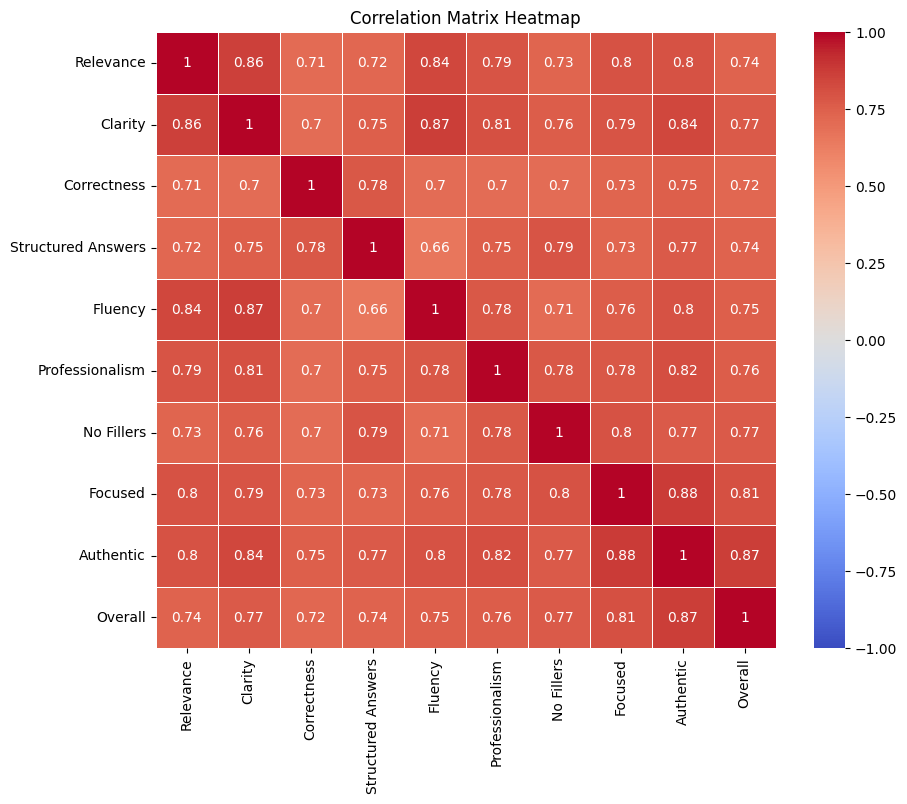

In [29]:
# plot the heatmap for the first dataset
plt.figure(figsize=(10, 8))
plot =sns.heatmap(corr1, cmap="coolwarm", annot=True, vmin = -1, vmax = 1, linewidth = 0.5)
plot.set_title('Correlation Matrix Heatmap')


In [30]:
corr2

,Relevance,Clarity,Correctness,Structured Answers,Fluency,Professionalism,No Fillers,Focused,Authentic,Overall
Relevance,1.00,0.92,0.83,0.82,0.93,0.93,0.87,0.88,0.92,0.77
Clarity,0.92,1.00,0.80,0.82,0.90,0.92,0.86,0.85,0.88,0.79
Correctness,0.83,0.80,1.00,0.85,0.77,0.82,0.82,0.86,0.85,0.76
Structured Answers,0.82,0.82,0.85,1.00,0.78,0.83,0.87,0.88,0.84,0.75
Fluency,0.93,0.90,0.77,0.78,1.00,0.90,0.83,0.86,0.88,0.78
Professionalism,0.93,0.92,0.82,0.83,0.90,1.00,0.89,0.89,0.93,0.78
No Fillers,0.87,0.86,0.82,0.87,0.83,0.89,1.00,0.87,0.90,0.78
Focused,0.88,0.85,0.86,0.88,0.86,0.89,0.87,1.00,0.90,0.78
Authentic,0.92,0.88,0.85,0.84,0.88,0.93,0.90,0.90,1.00,0.81
Overall,0.77,0.79,0.76,0.75,0.78,0.78,0.78,0.78,0.81,1.00


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

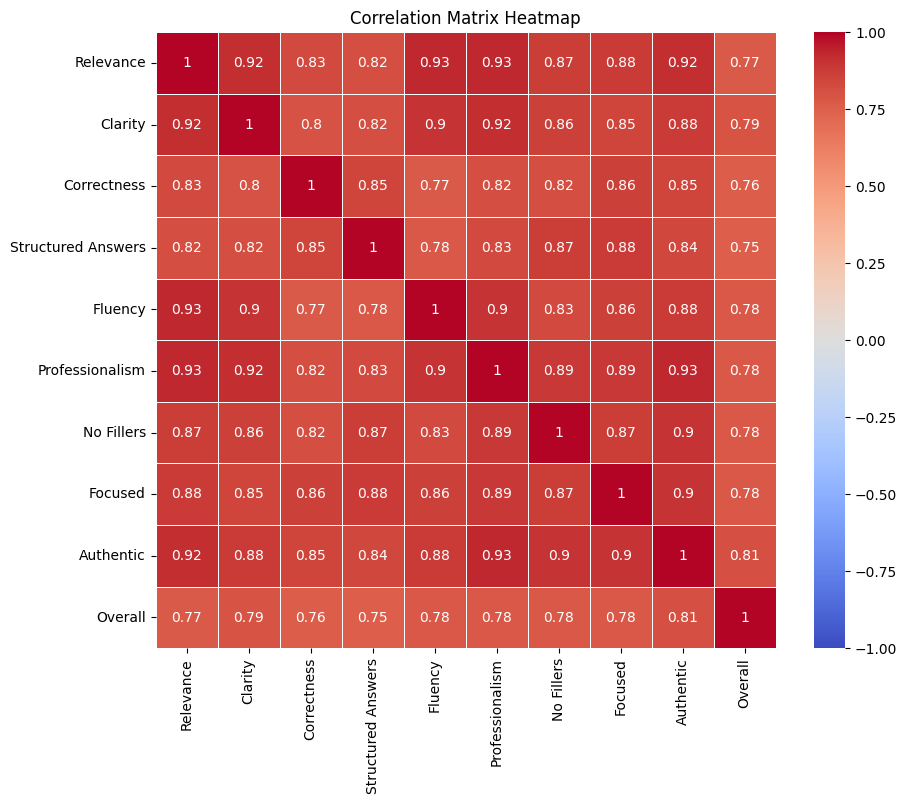

In [31]:
# plot the heatmap for the second dataset
plt.figure(figsize=(10, 8))
plot =sns.heatmap(corr2, cmap="coolwarm", annot=True, vmin = -1, vmax = 1, linewidth = 0.5)
plot.set_title('Correlation Matrix Heatmap')


In [32]:
#regression graph

In [33]:
matrix = np.triu(corr1)
matrix

array([[1.  , 0.86, 0.71, 0.72, 0.84, 0.79, 0.73, 0.8 , 0.8 , 0.74],
       [0.  , 1.  , 0.7 , 0.75, 0.87, 0.81, 0.76, 0.79, 0.84, 0.77],
       [0.  , 0.  , 1.  , 0.78, 0.7 , 0.7 , 0.7 , 0.73, 0.75, 0.72],
       [0.  , 0.  , 0.  , 1.  , 0.66, 0.75, 0.79, 0.73, 0.77, 0.74],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.78, 0.71, 0.76, 0.8 , 0.75],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.78, 0.78, 0.82, 0.76],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.8 , 0.77, 0.77],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.88, 0.81],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.87],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

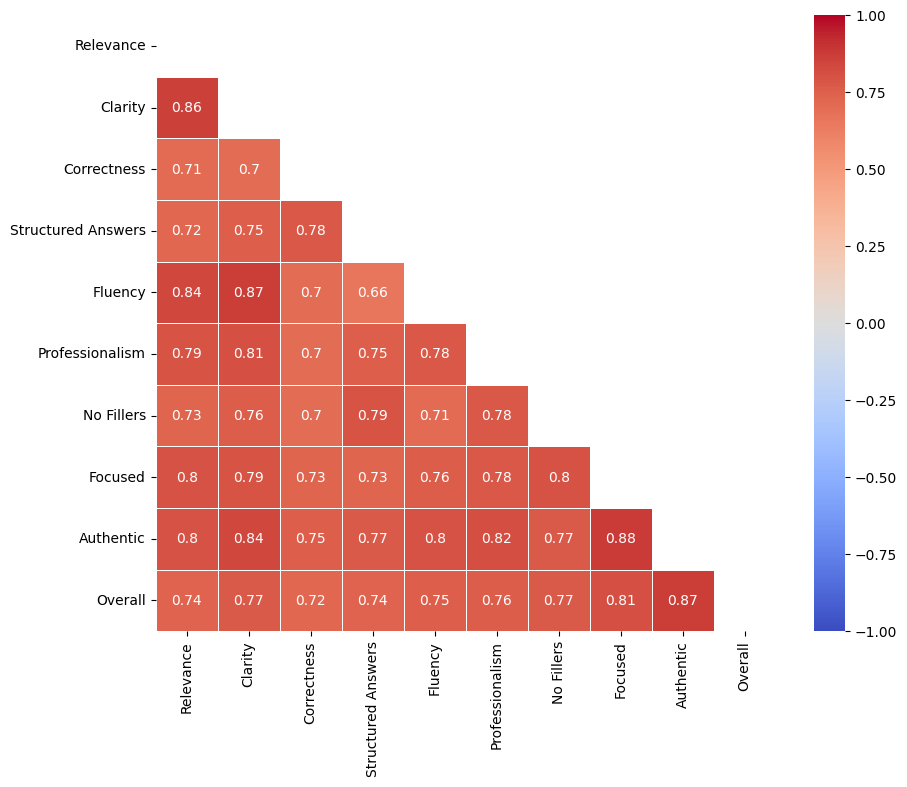

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(corr1, mask = matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1, linewidth = 0.5 )
plt.show()

In [35]:
matrix = np.triu(corr2)
matrix

array([[1.  , 0.92, 0.83, 0.82, 0.93, 0.93, 0.87, 0.88, 0.92, 0.77],
       [0.  , 1.  , 0.8 , 0.82, 0.9 , 0.92, 0.86, 0.85, 0.88, 0.79],
       [0.  , 0.  , 1.  , 0.85, 0.77, 0.82, 0.82, 0.86, 0.85, 0.76],
       [0.  , 0.  , 0.  , 1.  , 0.78, 0.83, 0.87, 0.88, 0.84, 0.75],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.9 , 0.83, 0.86, 0.88, 0.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.89, 0.89, 0.93, 0.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.87, 0.9 , 0.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.9 , 0.78],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.81],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

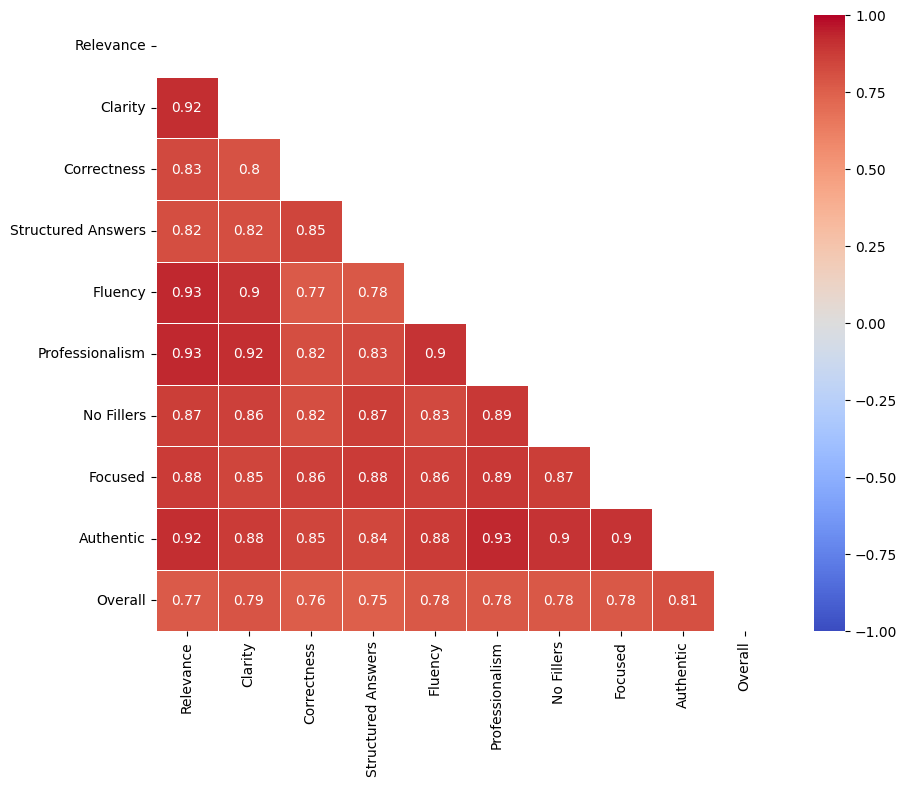

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(corr2, mask = matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1, linewidth = 0.5 )
plt.show()